In [1]:
import autokeras as ak
from openml import datasets
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import json
import time
from tensorflow.keras.models import load_model
import tensorflow as tf
    
def save_json(key,content):
    '''
    Zapisywanie wyników do jsona, żeby potem ich użyć w ipynb/prezentacji.
    '''
    with open("results.json","r") as f:
        loaded = json.load(f)
    
    loaded[key] = content
    
    with open("results.json", "w") as output:
        json.dump(loaded,output, indent=4)

def get_model(dataset_name):
    return load_model("models_trials5/model_" + dataset_name, custom_objects=ak.CUSTOM_OBJECTS)

def get_datasets(names):
    '''
    Funkcji podaje się listę nazw datasetów, ona szuka je w openml i zwraca je. Zwraca też listę nazw, których nie znalazło.
    '''
  
    ds = pd.DataFrame(datasets.list_datasets()).transpose().reset_index(drop = True)
    # zbieranie datasetów z api openmlowego
    matches = ds[np.in1d(ds.name,names)]  # to co się udalo znalezc po nazwie
    print("a")
    matches = matches[matches.status == "active"]   # wywalam nieaktywne
    matches.version = matches.version.astype(int)   # żeby mogło wybrać największą liczbę
    matches = matches.groupby("name").apply(lambda d: d.nlargest(1,columns = "version")) # wybieram te z najnowszą wersją
    matches.reset_index(drop = True, inplace = True)
    print("a")
    # jak wyszukiwałem po nazwie to nie znajdowało mi 9 datasetów
    unmatched = names[np.where(np.logical_not(np.in1d(names,ds.name)))[0]]    # to są te nieznalezione
    print(unmatched, "test")
    # zbieram datasety z api openmlowego uzywając ich id 
    ds_list = datasets.get_datasets(dataset_ids = matches.did)
    return ds_list, unmatched

In [2]:
def run(X : pd.DataFrame,y : pd.DataFrame, model_name):
    
    start = time.time()
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=420)
    clf = get_model(model_name)
    all_columns = list(test_X) # Creates list of all column headers
    test_X[all_columns] = test_X[all_columns].astype(str)
    
    # następne trzy linijki bo były problemy z typami
    prediction = pd.DataFrame(clf.predict(test_X))
    test_y = test_y.apply(pd.to_numeric, errors='coerce').fillna(test_y)
    prediction = prediction.apply(pd.to_numeric, errors='coerce').fillna(prediction)
    
    print(prediction)
    [print(i.shape, i.dtype) for i in clf.inputs]
    [print(o.shape, o.dtype) for o in clf.outputs]

     
    accuracy = accuracy_score(test_y, prediction)
    recall = recall_score(test_y, prediction,average='micro')
    precision = precision_score(test_y, prediction,average='micro')
    f1 = f1_score(test_y, prediction, average='micro')
    # auc = roc_auc_score(test_y,prediction) # trzeba ogarnac pewnie dla multilabelow
    
    
    scores_dict = {
        'accuracy' : accuracy, 
        'recall' : recall,
        'precision' : precision,
        'f1_micro' : f1
        # ,
        # 'auc' : auc
    }
    
    end = time.time()
    execution_time = end - start
    
    
    return clf, scores_dict, execution_time

In [3]:
dataset_names = np.array([       # nazwy wzięte ręcznie z dokumentu, bo nie działają linki do openml
    "adult",
    "airlines",
    "bank-marketing",
    "credit-g" ,
    "higgs",
    "jasmine",
    "kc1",
    "kr-vs-kp",
    "nomao",
    "numerai28.6",
    "phoneme" ,
    "sylvine",
    "car",
    "cnae-9",
    "connect-4",
    "covertype",
    "mfeat-factors",
    "segment",
    "shuttle",
    "vehicle",
    ])

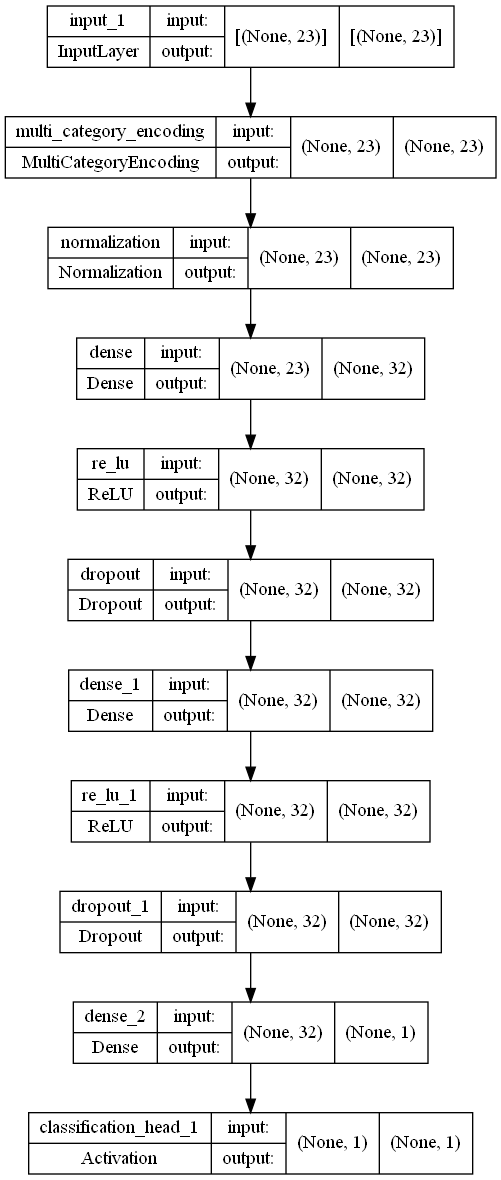

In [8]:
nazwa = "df_1_train"
clf = get_model(nazwa)
tf.keras.utils.plot_model(clf, to_file=nazwa + ".png", show_shapes=True)

In [6]:
for data in datasets:
    print(data.name + " in progress...")
    clf = get_model(data.name)
    tf.keras.utils.plot_model(clf, to_file=data.name + ".png", show_shapes=True)
    print(data.name + " done")

adult in progress...
adult done
airlines in progress...
airlines done
bank-marketing in progress...
bank-marketing done
car in progress...
car done
cnae-9 in progress...
cnae-9 done
connect-4 in progress...
connect-4 done
covertype in progress...
covertype done
credit-g in progress...
credit-g done
higgs in progress...
higgs done
jasmine in progress...
jasmine done
kc1 in progress...
kc1 done
kr-vs-kp in progress...
kr-vs-kp done
mfeat-factors in progress...
mfeat-factors done
nomao in progress...
nomao done
numerai28.6 in progress...
numerai28.6 done
phoneme in progress...
phoneme done
segment in progress...
segment done
shuttle in progress...
shuttle done
sylvine in progress...
sylvine done
vehicle in progress...
vehicle done
